In [46]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from os import path
import pickle
import itertools
from functools import partial
import pprint
pp = pprint.PrettyPrinter(indent=4)

import intra
import util
from util import md, highlight_max_min
from experiment import new_exp, get_loader, run_once, run_permutation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
loader = get_loader()

# Prototype

In [50]:
from data import gen_clusters

dataset = ''
alpha = 0.95
nvec, ncls, ncls_per_vec, nsel, dim = 0, 0, 0, 0, 0
noise = 0
cats, passes, topic_threshold = [], 10, 0.25
sz_clique = 0


print('nvec, ncls, noise, nsel, dim')
for nvec, ncls, noise, nsel, dim in itertools.product([1000], 
                                                        [10],
                                                        #[0.4,0.7,1.], 
                                                        [0.1], 
                                                        [10],
                                                        [2]):
    print(nvec, ncls, noise, nsel, dim)
    _run = None
    
    # Datasets
    proto, vecs, vec2cls = gen_clusters(nvec=nvec, ncls=ncls, dim=dim, noise=noise)
    intra_ = intra.Intra(vecs, vec2cls, ncls, nsel, metric='euclidean', eps=1)
    
    # Algorithms
#     sels_gv, disps_gv, vs_gv = run_permutation(1, 'gv', intra_.greedy_vertex, intra_, ncls, _run)
    
#     f = partial(intra_.local_search, intra=True, print_=False)
#     sel_min_lsi, sel_max_lsi = run_permutation(1, 'lsi', f, intra_, ncls, _run)

#     f = partial(intra_.local_search, intra=False, print_=False)
#     sel_lsg = run_once('lsg', f, intra_, ncls, _run)
    
    f = partial(intra_.greedy_edge, exact=False, alpha=alpha)
    sel_ge = run_once('ge', f, intra_, ncls, _run)

#     f = partial(intra_.local_search, init=sel_ge, intra=True, print_=False)
#     sel_gels= run_once('gels', f, intra_, ncls, _run)

nvec, ncls, noise, nsel, dim
1000 10 0.1 10 2
ge: 29.37


# Vis v6

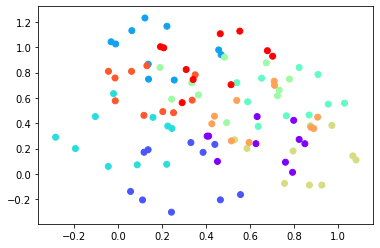

In [51]:
vs = intra_.vectors[np.concatenate(sel_ge)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_ge)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

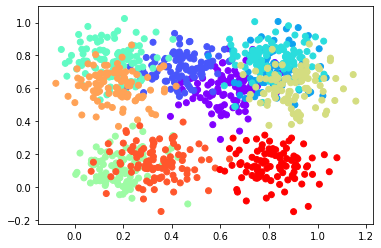

In [49]:
vs = intra_.vectors[np.concatenate(sel_ge)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_ge)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

# Vis cls3

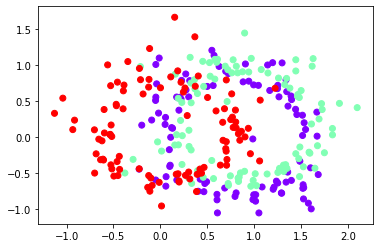

In [27]:
vs = intra_.vectors[np.concatenate(sel_max_gv)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_gv)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

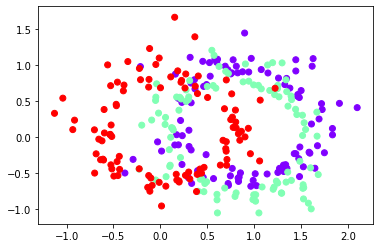

In [28]:
vs = intra_.vectors[np.concatenate(sel_max_lsi)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_lsi)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

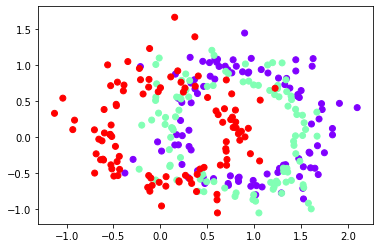

In [29]:
vs = intra_.vectors[np.concatenate(sel_ge)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_ge)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

# Vis noise0.1

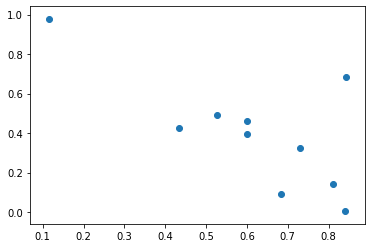

In [38]:
proto = np.random.rand(10, 2)
plt.scatter(proto[:,0], proto[:,1])
plt.show()

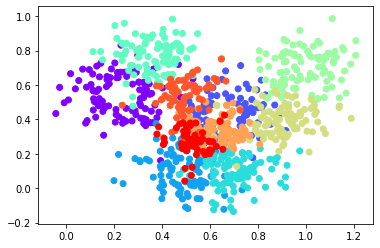

In [39]:
vs = intra_.vectors[np.concatenate(sel_max_gv)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_gv)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

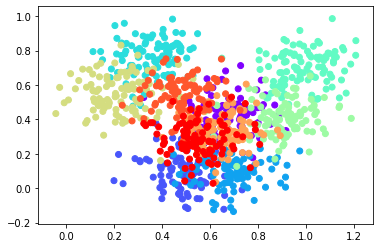

In [40]:
vs = intra_.vectors[np.concatenate(sel_max_lsi)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_lsi)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

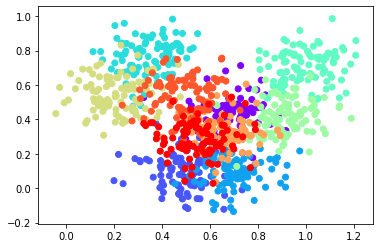

In [41]:
vs = intra_.vectors[np.concatenate(sel_ge)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_ge)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

In [44]:
print([len(s) for s in sel_max_gv])
print([len(s) for s in sel_max_lsi])
print([len(s) for s in sel_ge])

[100, 100, 100, 100, 100, 100, 97, 94, 77, 58]
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[90, 100, 96, 100, 94, 100, 94, 92, 100, 100]


# Vis noise0.4

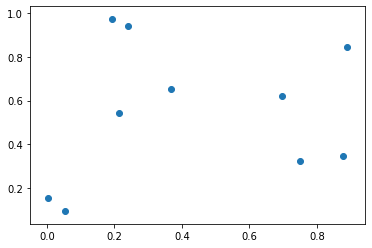

In [35]:
proto = np.random.rand(10, 2)
plt.scatter(proto[:,0], proto[:,1])
plt.show()

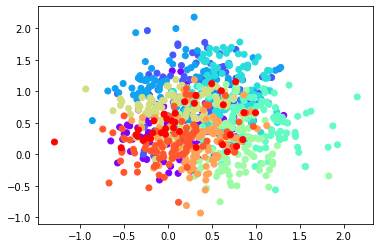

In [36]:
vs = intra_.vectors[np.concatenate(sel_max_gv)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_gv)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

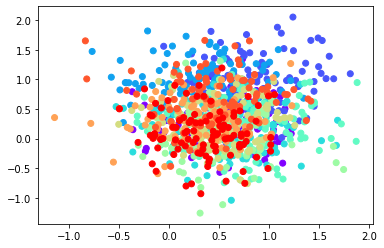

In [24]:
vs = intra_.vectors[np.concatenate(sel_max_lsi)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_lsi)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

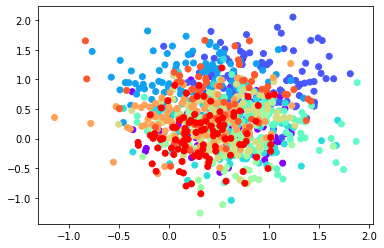

In [23]:
vs = intra_.vectors[np.concatenate(sel_ge)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_ge)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

# Vis noise1.0

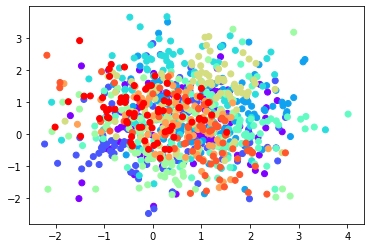

In [21]:
vs = intra_.vectors[np.concatenate(sel_max_gv)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_gv)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

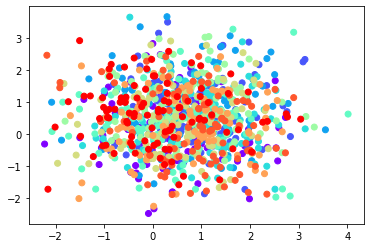

In [19]:
vs = intra_.vectors[np.concatenate(sel_max_lsi)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_max_lsi)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()

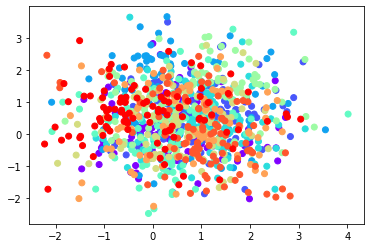

In [20]:
vs = intra_.vectors[np.concatenate(sel_ge)]
cls = [[c]*len(vs_) for c,vs_ in enumerate(sel_ge)]
plt.scatter(vs[:,0], vs[:,1], c=util.get_colors_by_cls(cls))
plt.show()